# Connecting to database

In [ ]:
import mysql.connector as connector

In [5]:
connection=connector.connect(user="admin1",password="123456")

In [6]:
cursor=connection.cursor()

In [7]:
use_db='''USE mg_schema'''

In [8]:
cursor.execute(use_db)

# Fetching data from server

In [9]:
select_query='''SELECT * FROM mobile_price'''

In [10]:
cursor.execute(select_query)

In [11]:
cursor.description

[('Rating', 4, None, None, None, None, 1, 0, 63),
 ('RAM', 4, None, None, None, None, 1, 0, 63),
 ('ROM', 4, None, None, None, None, 1, 0, 63),
 ('Mobile_size', 4, None, None, None, None, 1, 0, 63),
 ('Primary_cam', 4, None, None, None, None, 1, 0, 63),
 ('Selfie_cam', 4, None, None, None, None, 1, 0, 63),
 ('Battery_power', 4, None, None, None, None, 1, 0, 63),
 ('Price', 4, None, None, None, None, 1, 0, 63)]

In [13]:
result=cursor.fetchall()

# Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [19]:
df=pd.DataFrame(result , columns=[column[0] for column in cursor.description])

In [20]:
df1=df

# Data Preprocessing

In [21]:
df.head()

,Rating,RAM,ROM,Mobile_size,Primary_cam,Selfie_cam,Battery_power,Price
0,4.3,4.0,128.0,6.00,48.0,13.0,4000.0,24999.0
1,3.4,6.0,64.0,4.50,48.0,12.0,4000.0,15999.0
2,4.3,4.0,4.0,4.50,64.0,16.0,4000.0,15000.0
3,4.4,6.0,64.0,6.40,48.0,15.0,3800.0,18999.0
4,4.5,6.0,128.0,6.18,35.0,15.0,3800.0,18999.0


In [22]:
df.isna().sum()

Rating           0
RAM              0
ROM              0
Mobile_size      0
Primary_cam      0
Selfie_cam       0
Battery_power    0
Price            0
dtype: int64

In [23]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
802    False
803     True
804     True
805     True
806    False
Length: 807, dtype: bool

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rating         807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_size    807 non-null    float64
 4   Primary_cam    807 non-null    float64
 5   Selfie_cam     807 non-null    float64
 6   Battery_power  807 non-null    float64
 7   Price          807 non-null    float64
dtypes: float64(8)
memory usage: 50.6 KB


In [54]:
df.describe()

,Rating,RAM,ROM,Mobile_size,Primary_cam,Selfie_cam,Battery_power,Price
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,4.112639,5.941760,64.390335,5.620660,47.821561,8.868649,3278.859975,14269.167286
std,0.367830,2.056359,53.868626,3.957409,11.155916,4.547254,937.628801,23092.739983
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.000000
50%,4.100000,6.000000,32.000000,4.770000,48.000000,8.000000,3000.000000,1699.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18994.500000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,153000.000000


In [24]:
scaler=MinMaxScaler()

In [27]:
X=df.drop(columns=["Rating","Price"], axis=1)

In [28]:
X1=df.drop(columns=["Rating","Price"])

In [29]:
y=df["Price"]

In [30]:
X1

,RAM,ROM,Mobile_size,Primary_cam,Selfie_cam,Battery_power
0,4.0,128.0,6.00,48.0,13.0,4000.0
1,6.0,64.0,4.50,48.0,12.0,4000.0
2,4.0,4.0,4.50,64.0,16.0,4000.0
3,6.0,64.0,6.40,48.0,15.0,3800.0
4,6.0,128.0,6.18,35.0,15.0,3800.0
...,...,...,...,...,...,...
802,6.0,32.0,4.54,48.0,12.0,2800.0
803,8.0,64.0,4.54,64.0,8.0,2500.0
804,3.0,32.0,6.20,48.0,1.0,3800.0
805,10.0,32.0,4.50,64.0,8.0,3500.0


In [31]:
y

0      24999.0
1      15999.0
2      15000.0
3      18999.0
4      18999.0
        ...   
802     1299.0
803     1390.0
804     9790.0
805      799.0
806      799.0
Name: Price, Length: 807, dtype: float64

In [32]:
X=scaler.fit_transform(X)
X

array([[0.33333333, 0.49606299, 0.0952381 , 0.72881356, 0.56521739,
        0.59839357],
       [0.5       , 0.24409449, 0.05952381, 0.72881356, 0.52173913,
        0.59839357],
       [0.33333333, 0.00787402, 0.05952381, 1.        , 0.69565217,
        0.59839357],
       ...,
       [0.25      , 0.11811024, 0.1       , 0.72881356, 0.04347826,
        0.55823293],
       [0.83333333, 0.11811024, 0.05952381, 1.        , 0.34782609,
        0.49799197],
       [0.5       , 0.11811024, 0.05952381, 1.        , 0.65217391,
        0.0060241 ]])

<Axes: ylabel='Price'>

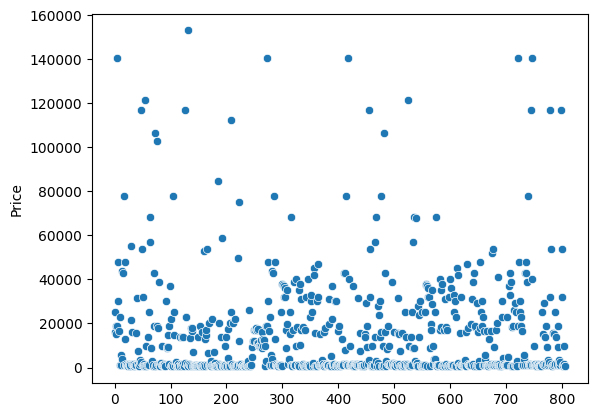

In [49]:
sns.scatterplot(df["Price"])

<Axes: ylabel='Price'>

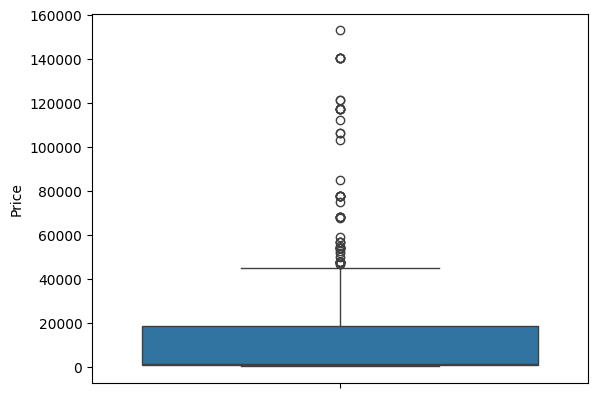

In [51]:
sns.boxplot(df["Price"])

<Axes: >

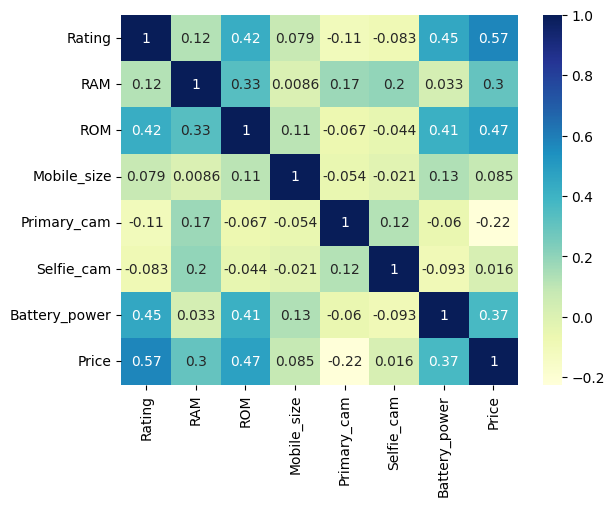

In [52]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

# Model Building

In [33]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)
X1_test,X1_train,y_test,y_train=train_test_split(X1,y,train_size=0.8,random_state=42)

In [36]:
rfr=RandomForestRegressor()

In [37]:
rfr.fit(X1_train,y_train)

RandomForestRegressor()

In [38]:
y_pred=rfr.predict(X1_test)

In [39]:
r2_score(y_test,y_pred)

0.7639003681245137

In [40]:
rfr.score(X1_train,y_train)

0.976701128167462

In [41]:
bg=BaggingRegressor()
bg.fit(X_train,y_train)
y_p1=bg.predict(X_test)
y_p1

array([ 34595.4       ,   1382.16333333,    962.01666667,  19949.96666667,
         1884.1       ,   1292.2       ,   1315.7       ,    849.7       ,
         2773.8       , 101541.15      ,   1002.1       ,    677.27333333,
        15944.3       ,   1906.        ,   1664.        ,  34595.4       ,
         1810.8       ,  11918.4       ,  68764.46666667,  12467.63333333,
          677.27333333,  37057.3       ,  30947.1       ,  20585.23333333,
        17898.1       ,   2237.3       ,   6556.8       ,  14799.        ,
          886.95      ,  20696.        ,   1682.62666667,  17595.85      ,
          835.26666667,  68446.05      ,    886.95      ,  17022.125     ,
        15516.1       ,  56834.55      ,   1340.6       ,    659.        ,
         1382.16333333,  32650.7       ,  16526.4       ,  85678.8       ,
         7042.61666667,   1382.16333333,  45965.66666667,  19543.4       ,
         1277.88      ,  46958.4       ,  12082.6       ,  12082.6       ,
         5462.5       ,  

In [42]:
r2_score(y_test,y_p1)

0.7337193455402831

In [43]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_p2=lr.predict(X_test)

In [44]:
r2_score(y_test,y_p2)

0.3289724601888865

In [45]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_p3=knn.predict(X_test)

In [46]:
r2_score(y_test,y_p3)

0.6322399878908327

In [47]:
import pickle

In [48]:
pickle.dump(rfr,open("model.pkl","wb"))